# DAT101 Statistic For Data Analysis - Term Project
### Written by June Tan on July 19, 2023 

### 1. Purpose and Objectives

Purpose of this analysis of historical baseball statistics  over multiple time periods is to determine if baseball teams are more successful with high offenses, tight defenses or a balance of the two.

**This analysis will present:** 
- the main style of play (offensive, defensive or balanced) for Period 1 (before 1920), Period 2 (1920 to 1959), Period 3 (1960 to 1989) and Period 4 (1990 to 2010).
- include a predictive model to predict the number of games a team is expected to win.

We are looking to shed some light on these questions:
1. Is there a relationship between offensive plays and games won? Is there a relationship between defensive plays and games won?
2. How strong are those relationships?
3. Which type of play contributes to most games won?
4. What is the effect of each type of play?
5. Given type of play, can games won be predicted?

**The results and conclusions of the analysis will assist team coaches and managers in:**
- forming next season's team line up.
- knowing which skillsets to look out for in the next draft pick to form teams' best style of play.

In [11]:
import pandas as pd
import seaborn as sns
import statsmodels.formula.api as smf
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn import metrics 
from sklearn.model_selection  import train_test_split
import numpy as np

# allow plots to appear directly in the notebook
%matplotlib inline

### 2. Data Exploration
The data in the csv file called 'baseball_teams.csv' describes historical baseball team performance and includes the following data fields. 

These data fields are categorized as:
- Descriptive Fields ie. Year, League
- Team Performance ie. Final Standing, Games Played
- Offensive Measurements ie. Runs Scored, At Bats
- Defensive Measurements ie. Runs Against, Earned Runs
- Miscellaneous ie. Home Ball Park, Attendance


Note: For conformity, these data fields will be referred to as variables.  

In [12]:
# Load data 
df = pd.read_csv('baseball_teams.csv')
df.tail()

,Year,League,Team,Franchise,Division,Final_Standing,Games_Played,Unnamed: 7,Games_Won,Games_Lost,...,Hits_Allowed,Home_Run_Allowed,Walks_Allowed,Strikeouts_Allowed,Errors,Double_Plays,Fielding_Percentage,Team_Name,Home_Ball_Park,Attendance
2800,2015,NL,LAN,LAD,W,1,162,81.0,92,70,...,1317,145,395,1396,75,133.0,0.988,Los Angeles Dodgers,Dodger Stadium,3764815
2801,2015,NL,SFN,SFG,W,2,162,81.0,84,78,...,1344,155,431,1165,78,145.0,0.987,San Francisco Giants,AT&T Park,3375882
2802,2015,NL,ARI,ARI,W,3,162,81.0,79,83,...,1450,182,500,1215,86,146.0,0.986,Arizona Diamondbacks,Chase Field,2080145
2803,2015,NL,SDN,SDP,W,4,162,81.0,74,88,...,1371,171,516,1393,92,138.0,0.985,San Diego Padres,Petco Park,2459742
2804,2015,NL,COL,COL,W,5,162,81.0,68,94,...,1579,183,579,1112,95,171.0,0.985,Colorado Rockies,Coors Field,2506789


In [14]:
# Dropping unindentified columns
df = df.drop(['Unnamed: 7', 'Unnamed: 10', 'Unnamed: 11'], axis=1)

#### Creating datasets based on stipulated time period
#### Period 1 – before 1920

In [15]:
df_period1 = df[df['Year'] < 1920]

#### Period 2 - 1920 to 1959

In [16]:
df_period2 = df[(df['Year']<=1959) & (df['Year']>=1920)]

#### Period 3 - 1960 to 1989

In [17]:
df_period3 = df[(df['Year']<=1989) & (df['Year']>=1960)]

#### Period 4 - 1990 to 2010

In [18]:
df_period4 = df[(df['Year']<=2010) & (df['Year']>=1990)]

### 3. Correlation Analysis 

We want to predict Games Won (dependent variable) with our prediction model. Visualisation using heatmap correlation matrix for each time period is used to determine best predictor variables (independent variables) for number of games won. Highest correlated independent variables also determines dominant style of play and is summarised  for each time period. For this analysis purpose, we will pick top 8 independent variables for consideration.

**Note:** Dominant style of play is determined by majority of measured variable ie. if the number of offensive variables in the set of 8 is >=6 then the period is rated as offensive. If the number of defensive variables in the set of 8 is >=6 then rate the period as defensive. Otherwise, the period is rated as balanced.  

Text(0.5, 1.0, 'Fig1: Correlation matrix period 1 (before 1920)')

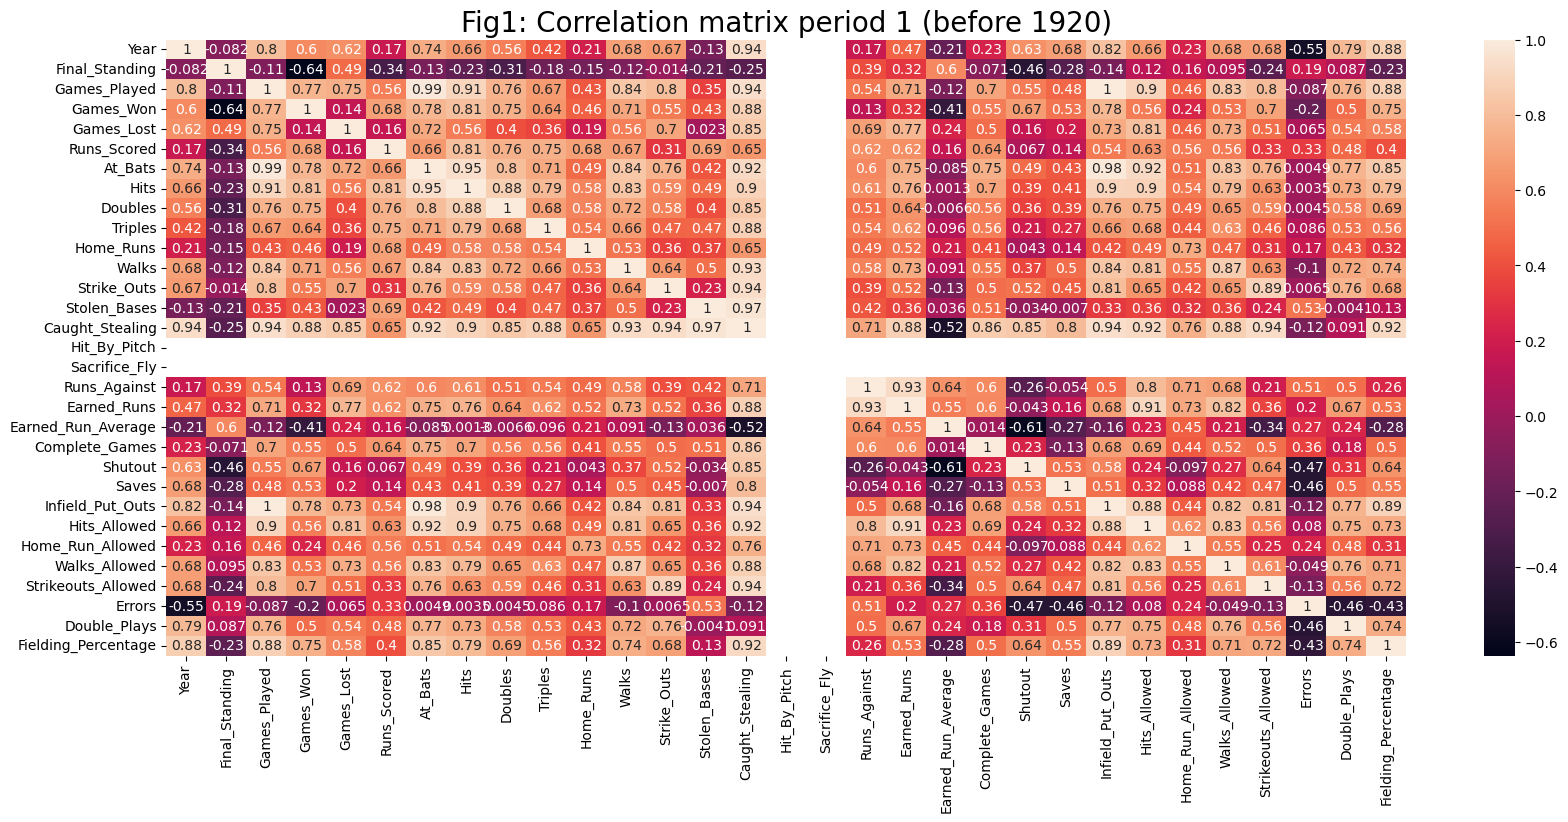

In [19]:
plt.figure(figsize=(20, 8))
sns.heatmap(df_period1.corr(numeric_only="True"), annot=True)
plt.title("Fig1: Correlation matrix period 1 (before 1920)", fontsize=20)

**Top 8 independent variables that are correlated to 'Games_Won' for period 1 - before 1920.**
1. (O) At_Bats 
2. (O) Hits  
3. (O) Doubles  
4. (O) Walks 
5. (O) Caught_Stealing  
6. (D) Infield_Put_Outs 
7. (D) Strikeouts_Allowed
8. (D) Fielding_Percentage

**Style of play for period 1 : Balanced**

Text(0.5, 1.0, 'Fig2: Correlation matrix period 2 (1920 to 1959)')

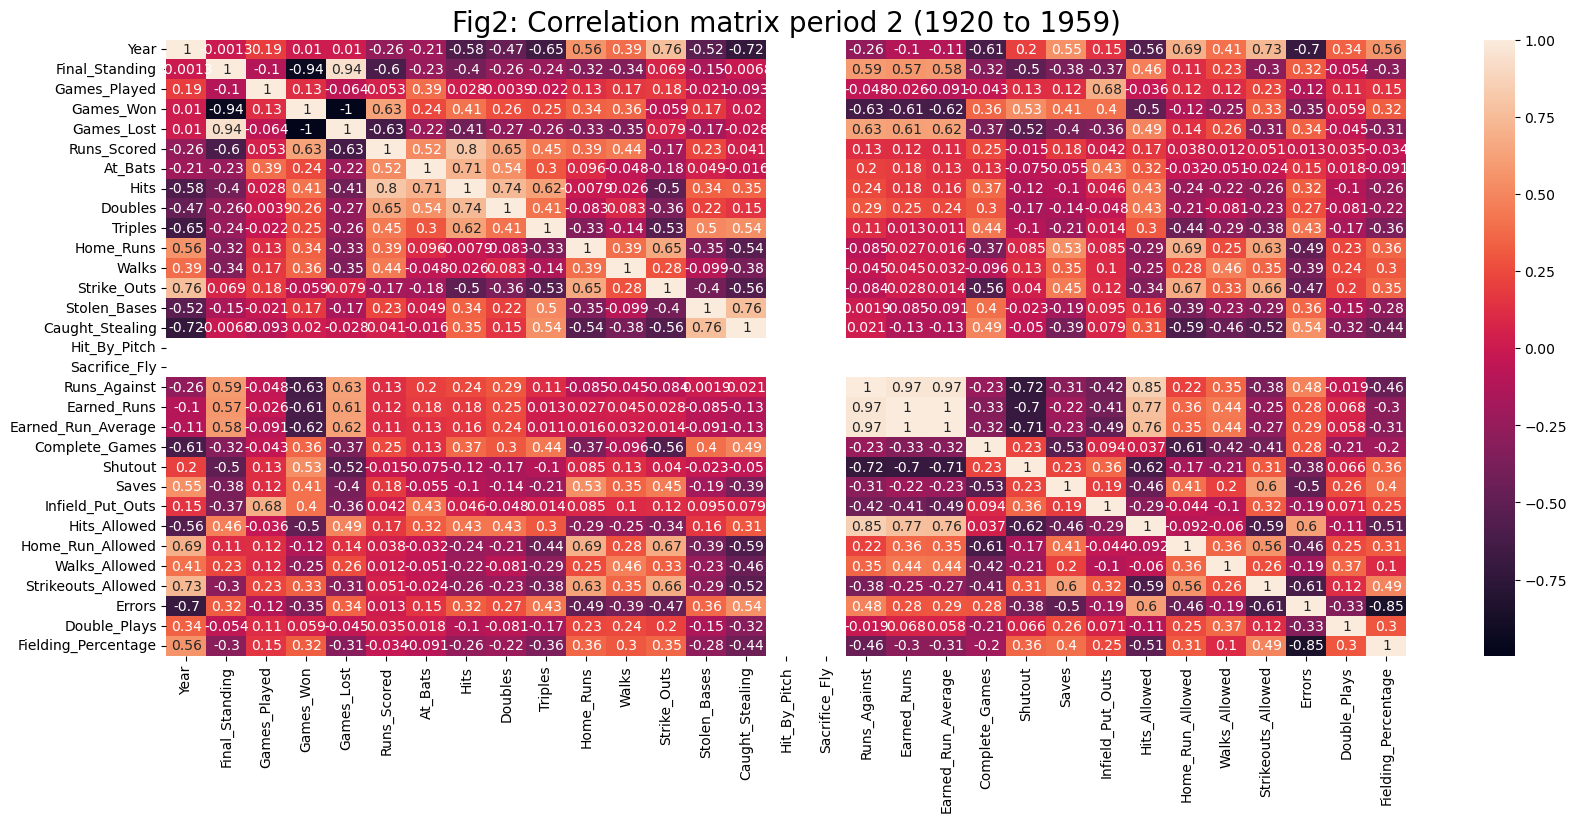

In [20]:
plt.figure(figsize=(20, 8))
sns.heatmap(df_period2.corr(numeric_only="True"), annot=True)
plt.title("Fig2: Correlation matrix period 2 (1920 to 1959)", fontsize=20)

**Top 8 independent variables that are correlated to 'Games_Won' for period 2 - 1920 - 1959**
1. (O) Runs_Scored 
2. (O) Hits
3. (D) Runs_Against 
4. (D) Earned_Runs 
5. (D) Earned_Run_Average 
6. (D) Shutout  
7. (D) Saves
8. (D) Hits_Allowed

**Style of Play for period 2: Defensive**

Text(0.5, 1.0, 'Fig3: Correlation matrix period 3 (1960 to 1989)')

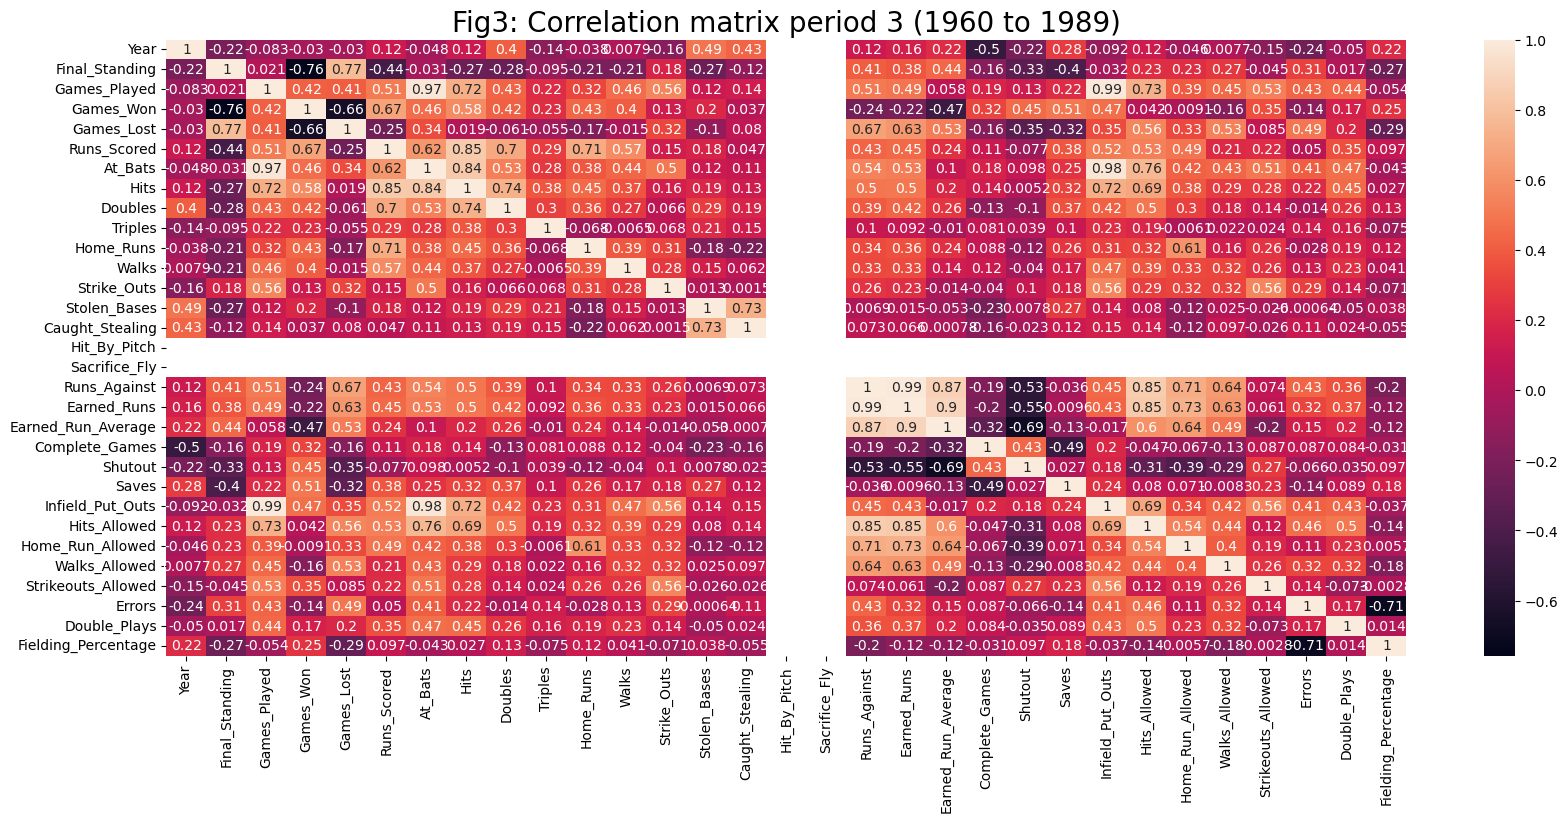

In [21]:
plt.figure(figsize=(20, 8))
sns.heatmap(df_period3.corr(numeric_only="True"), annot=True)
plt.title("Fig3: Correlation matrix period 3 (1960 to 1989)", fontsize=20)

**Top 8 independent variables that are correlated to 'Games_Won' for period 3 - 1960 to 1989**
1. (O) Runs_Scored 
2. (O) At_Bats  
3. (O) Hits  
4. (O) Home_Runs   
5. (D) Earned_Run_Average 
6. (D) Shutout  
7. (D) Saves     
8. (D) Infield_Put_Outs

**Style of play for period 3: Balanced**

Text(0.5, 1.0, 'Fig4: Correlation matrix period 4 (1990 to 2010)')

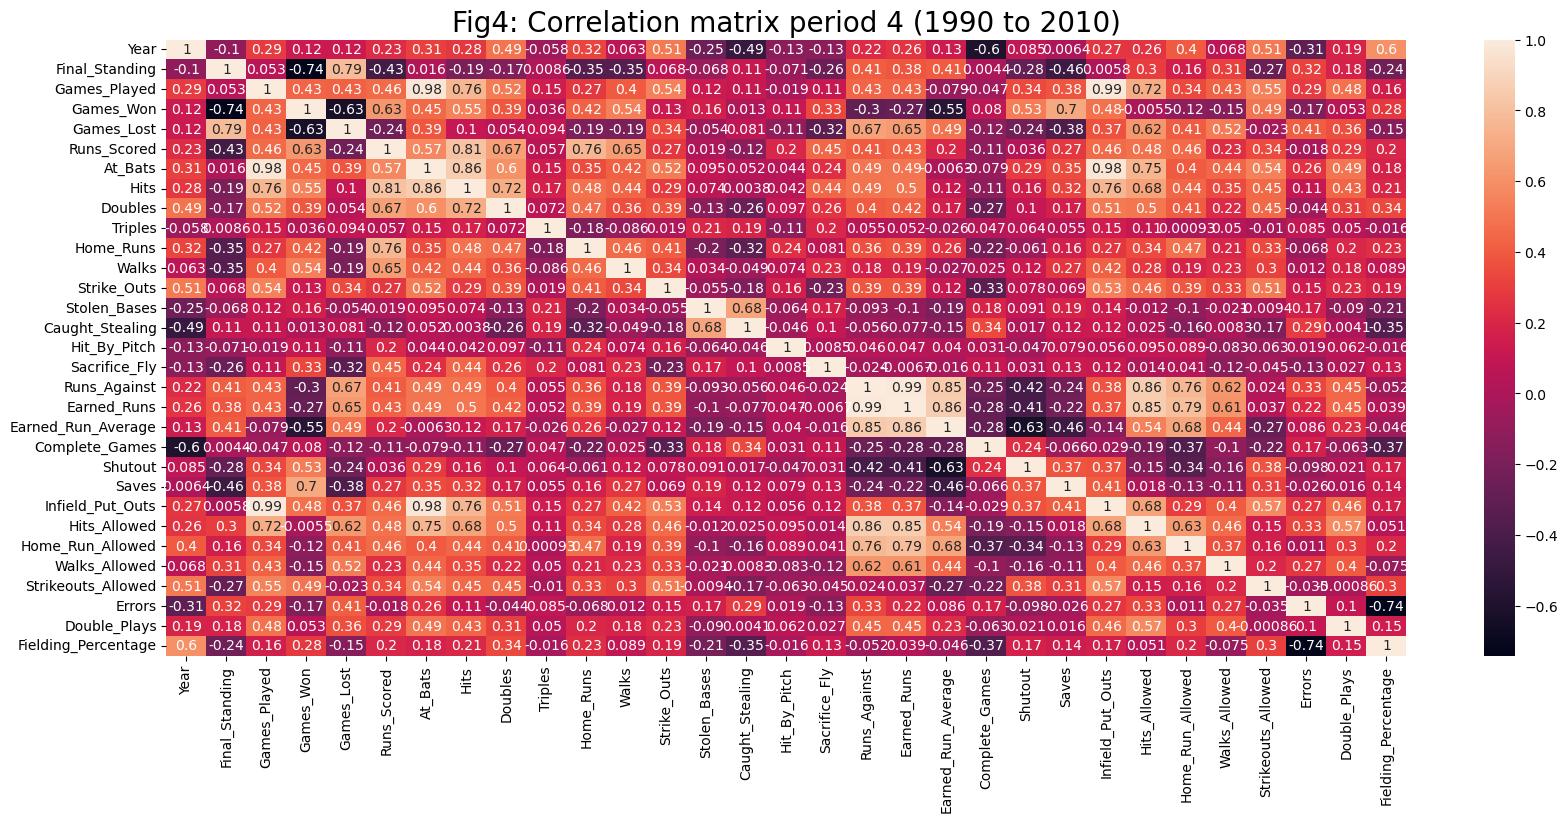

In [22]:
plt.figure(figsize=(20, 8))
sns.heatmap(df_period4.corr(numeric_only="True"), annot=True)
plt.title("Fig4: Correlation matrix period 4 (1990 to 2010)", fontsize=20)

**Top 8 independent variables that are correlated to 'Games_Won' for period 4 - 1990 to 2010**
1. (O) Runs_Scored  
2. (O) Hits  
3. (O) Walks 
4. (O) Earned_Run_Average  
5. (D) Shutout  
6. (D) Saves  
7. (D) Infield_Put_Outs 
8. (D) Strikeouts_Allowed  

**Style of play for period 4 : Balanced** 

### 4. Regression Modelling
We will examine further the relationship and influence of various independent variables on Games Won through visualisation charts.  

#### Create dataset df_period4_var with top 8 independent variables from period 4 

In [23]:
df_period4_var = df_period4[['Year', 'Team', 'Games_Won','Runs_Scored','Hits','Walks','Earned_Run_Average','Shutout','Saves', 'Infield_Put_Outs', 'Strikeouts_Allowed']]

#### Descriptive statistics 

In [24]:
df_period4_var.describe()

,Year,Games_Won,Runs_Scored,Hits,Walks,Earned_Run_Average,Shutout,Saves,Infield_Put_Outs,Strikeouts_Allowed
count,608.000000,608.000000,608.000000,608.000000,608.000000,608.000000,608.000000,608.000000,608.000000,608.000000
mean,2000.259868,79.445724,747.483553,1441.445724,536.782895,4.344375,8.276316,40.047697,4254.504934,1017.412829
std,5.994086,12.282923,93.733980,117.725690,78.410122,0.547203,3.856909,7.784962,283.179215,135.513189
min,1990.000000,43.000000,466.000000,963.000000,319.000000,3.060000,0.000000,20.000000,2952.000000,560.000000
25%,1995.000000,71.000000,686.000000,1398.000000,486.750000,3.950000,6.000000,35.000000,4300.000000,935.500000
50%,2000.000000,79.500000,747.000000,1452.500000,533.000000,4.310000,8.000000,40.000000,4328.000000,1021.000000
75%,2005.000000,88.000000,807.000000,1510.250000,589.250000,4.712500,11.000000,45.000000,4358.000000,1106.250000
max,2010.000000,116.000000,1009.000000,1684.000000,775.000000,6.380000,24.000000,68.000000,4467.000000,1404.000000


#### Histogram

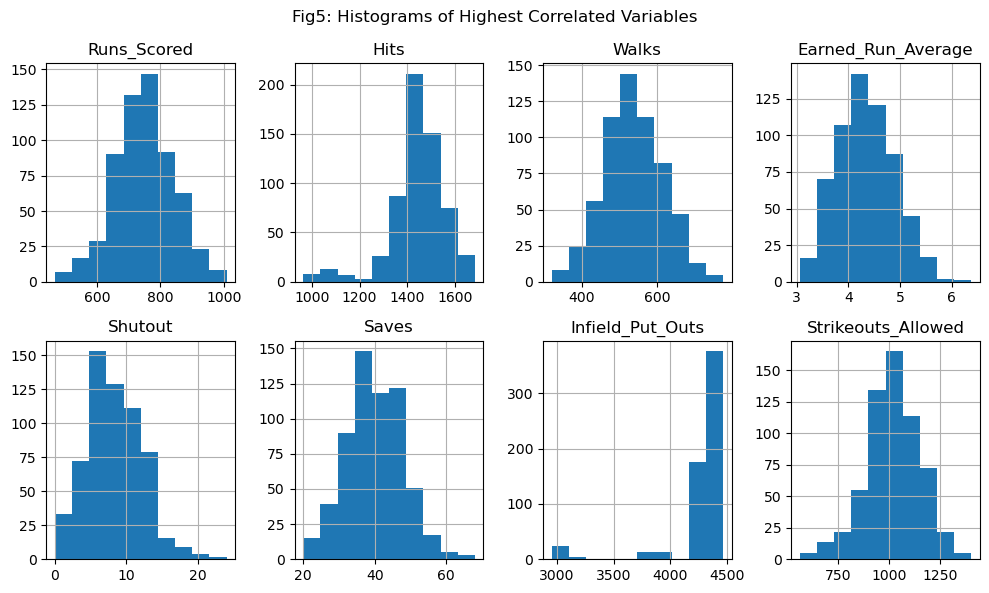

In [25]:
fig, ax = plt.subplots(2, 4, figsize=(10, 6))

# draw histograms - for one column in each subplot
df_period4_var.hist('Runs_Scored', ax=ax[0,0])
df_period4_var.hist('Hits', ax=ax[0,1])
df_period4_var.hist('Walks', ax=ax[0,2])
df_period4_var.hist('Earned_Run_Average', ax=ax[0,3])
df_period4_var.hist('Shutout', ax=ax[1,0])
df_period4_var.hist('Saves', ax=ax[1,1])
df_period4_var.hist('Infield_Put_Outs', ax=ax[1,2])
df_period4_var.hist('Strikeouts_Allowed', ax=ax[1,3])

#plt.subplots_adjust(wspace=0.5) 
plt.suptitle('Fig5: Histograms of Highest Correlated Variables')
fig.tight_layout()
plt.show()

**Assessment of visual shape of histograms**
1. Runs_Scored - symmetric, single mode 
2. Hits        - not symmetric, single mode  
3. Walks       - symmetric, single mode 
4. Earned_Run_Average - not symmetric, single mode  
5. Shutout     - not symmetric, single mode 
6. Saves       - not symmetric , single mode
7. Infield Put Outs   - not symmetric, single mode 
8. Strikeouts_Allowed - not symmetric, single mode 

#### Using QQplots to further visualize distribution and outliers

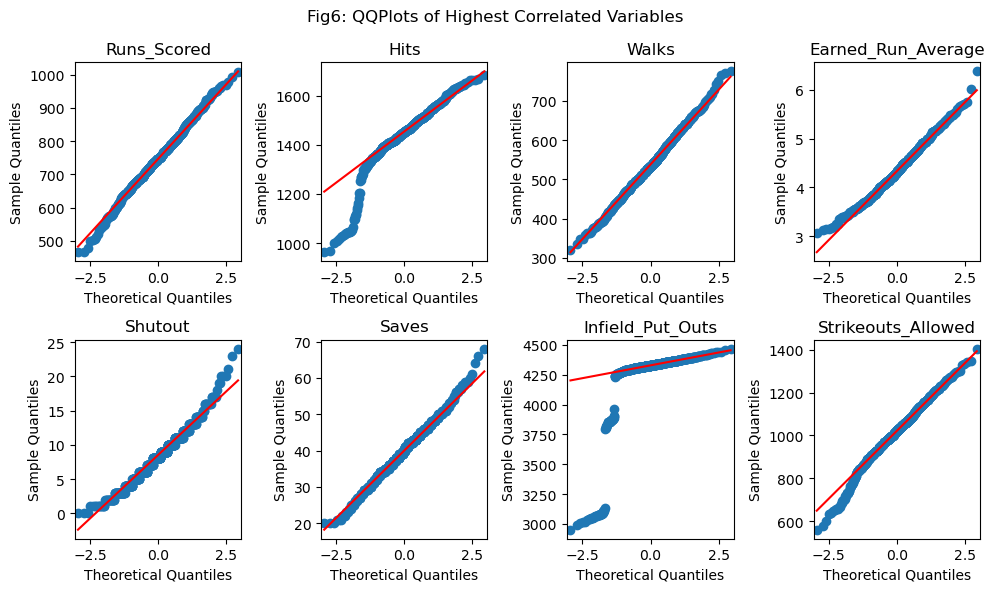

In [26]:
fig, ax = plt.subplots(2, 4, figsize=(10, 6))

sm.qqplot(df_period4_var['Runs_Scored'], ax=ax[0,0], line='q')
ax[0,0].set_title('Runs_Scored')
 
sm.qqplot(df_period4_var['Hits'], ax=ax[0,1], line='q')
ax[0,1].set_title('Hits')

sm.qqplot(df_period4_var['Walks'], ax=ax[0,2], line='q')
ax[0,2].set_title('Walks')

sm.qqplot(df_period4_var['Earned_Run_Average'], ax=ax[0,3], line='q')
ax[0,3].set_title('Earned_Run_Average')

sm.qqplot(df_period4_var['Shutout'], ax=ax[1,0], line='q')
ax[1,0].set_title('Shutout')

sm.qqplot(df_period4_var['Saves'], ax=ax[1,1], line='q')
ax[1,1].set_title('Saves')

sm.qqplot(df_period4_var['Infield_Put_Outs'], ax=ax[1,2], line='q')
ax[1,2].set_title('Infield_Put_Outs')

sm.qqplot(df_period4_var['Strikeouts_Allowed'], ax=ax[1,3], line='q')
ax[1,3].set_title('Strikeouts_Allowed')

plt.suptitle("Fig6: QQPlots of Highest Correlated Variables")
fig.tight_layout()
plt.show()

#### Boxplot

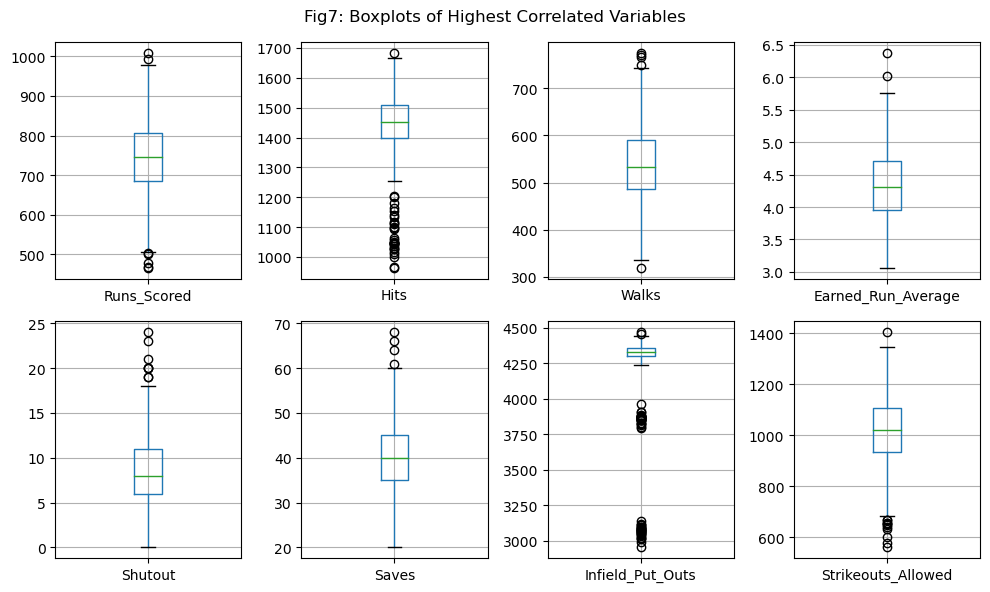

In [27]:
fig, ax = plt.subplots(2, 4, figsize=(10, 6))

# draw boxplot - for one column in each subplot
df_period4_var.boxplot('Runs_Scored', ax=ax[0,0])
df_period4_var.boxplot('Hits', ax=ax[0,1])
df_period4_var.boxplot('Walks', ax=ax[0,2])
df_period4_var.boxplot('Earned_Run_Average', ax=ax[0,3])
df_period4_var.boxplot('Shutout', ax=ax[1,0])
df_period4_var.boxplot('Saves', ax=ax[1,1])
df_period4_var.boxplot('Infield_Put_Outs', ax=ax[1,2])
df_period4_var.boxplot('Strikeouts_Allowed', ax=ax[1,3])

#plt.subplots_adjust(wspace=0.5) 
plt.suptitle("Fig7: Boxplots of Highest Correlated Variables")
fig.tight_layout()
plt.show()

**Assessment of boxplot for each variable:**
1. Runs_Scored - wide, data is symmetrically spread close to mean; more outliers below lower expected boundary 
2. Hits - relatively narrow, data is symmetrically spread; more outliers below lower expected boundary
3. Walks - wide, data is not symmetrically spread; more outliers above upper expected boundary  
4. Earned_Run_Average - wide, data is symmetrically spread; more outliers above upper expected boundary 
5. Shutout - wide, data not symmetrically spread; more outliers above upper expected boundary  
6. Saves - wide, data symmetrically spread; more outliers above upper expected boundary   
7. Infield Put Outs - very narrow; many outliers below lower expected boundary
8. Strikeouts_Allowed - wide, data is symetrically spread; more outliers below lower expected boundary 

### Linear Regression Models

Splitting the data from period 4 into 70% to training data to build the model and 30% to test data to evaluate the model.

In [28]:
x_train, x_test, y_train, y_test = train_test_split(df_period4_var, df_period4_var['Games_Won'],test_size=0.3, random_state=0)

#### First iteration -  multiple linear regression model - using variables with highest correlations.

In [29]:
lm1 = smf.ols(formula='Games_Won ~ Runs_Scored + Walks + Earned_Run_Average + Saves', data=x_train).fit()
lm1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Games_Won   R-squared:                       0.920
Model:                            OLS   Adj. R-squared:                  0.919
Method:                 Least Squares   F-statistic:                     1200.
Date:                Fri, 21 Jul 2023   Prob (F-statistic):          2.73e-228
Time:                        01:58:38   Log-Likelihood:                -1134.2
No. Observations:                 425   AIC:                             2278.
Df Residuals:                     420   BIC:                             2299.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             50.1300      2.248     22.304      0.000      45.712      54.548
Runs_Scored            0.0863      0.003     32.590      0.000       0.081       0.091
Walks                  0.0041      0.003      1.378      0.169      -0.002       0.010
Earned_Run_Average   -12.4592      0.389    -32.045      0.000     -13.223     -11.695
Saves                  0.4171      0.027     15.400      0.000       0.364       0.470
==============================================================================
Omnibus:                        0.160   Durbin-Watson:                   1.993
Prob(Omnibus):                  0.923   Jarque-Bera (JB):                0.263
Skew:                           0.028   Prob(JB):                        0.877
Kurtosis:                       2.892   Cond. No.                     1.24e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.24e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

##### Note that the Walks coefficient has p-value > 0.05. This implies that it is statistically same as zero and not significant. We will remove it in next iteration.  

#### Second iteration - eliminate coefficient p-value > 0.05 and create new model lm2. 

In [30]:
lm2 = smf.ols(formula='Games_Won ~ Runs_Scored + Earned_Run_Average + Saves', data=x_train).fit()
lm2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Games_Won   R-squared:                       0.919
Model:                            OLS   Adj. R-squared:                  0.919
Method:                 Least Squares   F-statistic:                     1596.
Date:                Fri, 21 Jul 2023   Prob (F-statistic):          1.62e-229
Time:                        01:58:38   Log-Likelihood:                -1135.2
No. Observations:                 425   AIC:                             2278.
Df Residuals:                     421   BIC:                             2295.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             50.9491      2.170     23.481      0.000      46.684      55.214
Runs_Scored            0.0886      0.002     43.262      0.000       0.085       0.093
Earned_Run_Average   -12.5523      0.383    -32.749      0.000     -13.306     -11.799
Saves                  0.4190      0.027     15.473      0.000       0.366       0.472
==============================================================================
Omnibus:                        0.057   Durbin-Watson:                   1.996
Prob(Omnibus):                  0.972   Jarque-Bera (JB):                0.147
Skew:                           0.003   Prob(JB):                        0.929
Kurtosis:                       2.909   Cond. No.                     9.67e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.67e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Evaluation of the models lm1 and lm2
#### First iteration lm1 using combination of offensive and defensive variable 
- R-squared :  0.920
- Adjusted R-squared : 0.919
- F-statistic : 1200

#### Second iteration lm2 using combination of offensive and defensive variable 
- R-squared :  0.919
- Adjusted R-squared : 0.919
- F-statistic : 1596

#### Key findings: 
- For first iteration lm1, coefficients Intercept, Runs Scored, Earned Run Average and Saves have p-values < 0.05. 
- Thus we reject null hypothesis for Runs Scored, Earned Run Average and Saves as the results are statistically significant at the 95% level of confidence.
- Coefficient Walks shows p-value > 0.05. We do not reject the null hypothesis for Walks as the results are not statistically significant.
- R-squared and adjusted R-squared from lm1 are close to 1. F-statistic has a large value of 1200. 
<br>

- After second iteration lm2, we see R values did not change, are still close to 1 and **an increase in F-statistic value.** the model has accounted for over 91% in the variation in the data and is statistically significant. 

##### Therefore, model lm2  (F-statistic = 1596) will be used as final regression model for our prediction.

#### Models using offensive vs defensive variables. 
Since the features of game statistics are distinctively split into offensive vs defensive, we will compare linear regression models using just either variables.

In [31]:
lm_offensive = smf.ols(formula='Games_Won ~ Runs_Scored + Walks', data=x_train).fit()
lm_offensive.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Games_Won   R-squared:                       0.445
Model:                            OLS   Adj. R-squared:                  0.443
Method:                 Least Squares   F-statistic:                     169.4
Date:                Fri, 21 Jul 2023   Prob (F-statistic):           9.69e-55
Time:                        01:58:38   Log-Likelihood:                -1544.5
No. Observations:                 425   AIC:                             3095.
Df Residuals:                     422   BIC:                             3107.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      12.2134      3.651      3.345      0.001       5.037      19.390
Runs_Scored     0.0607      0.006      9.741      0.000       0.048       0.073
Walks           0.0397      0.008      5.240      0.000       0.025       0.055
==============================================================================
Omnibus:                        4.200   Durbin-Watson:                   2.136
Prob(Omnibus):                  0.122   Jarque-Bera (JB):                3.100
Skew:                           0.056   Prob(JB):                        0.212
Kurtosis:                       2.597   Cond. No.                     7.59e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.59e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [32]:
lm_defensive = smf.ols(formula='Games_Won ~ Earned_Run_Average + Saves', data=x_train).fit()
lm_defensive.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Games_Won   R-squared:                       0.560
Model:                            OLS   Adj. R-squared:                  0.558
Method:                 Least Squares   F-statistic:                     268.5
Date:                Fri, 21 Jul 2023   Prob (F-statistic):           5.91e-76
Time:                        01:58:38   Log-Likelihood:                -1495.3
No. Observations:                 425   AIC:                             2997.
Df Residuals:                     422   BIC:                             3009.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             66.2537      4.990     13.278      0.000      56.446      76.062
Earned_Run_Average    -5.7007      0.814     -7.007      0.000      -7.300      -4.102
Saves                  0.9426      0.056     16.692      0.000       0.832       1.054
==============================================================================
Omnibus:                        0.898   Durbin-Watson:                   1.976
Prob(Omnibus):                  0.638   Jarque-Bera (JB):                0.956
Skew:                           0.030   Prob(JB):                        0.620
Kurtosis:                       2.776   Cond. No.                         518.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Comment: Both models lm_offensive and lm_defensive shows low R-squared and adjusted R-squared values compared to model lm2.  This further shows model lm2 with combination of offensive and defensive coefficients is the best fit model for our data.

### 5. Model Validation 

#### Make prediction for number of games won and derive error metrics using test data x_test from period 4

In [33]:
lm2_predict=lm2.predict(x_test)
predict_values=pd.concat([x_test["Games_Won"], x_test['Year'],lm2_predict],axis=1).set_index('Year')
predict_values.columns=["Actual_Games_Won","Predicted_Games_Won"]
predict_values["residual"]=predict_values["Actual_Games_Won"]-predict_values["Predicted_Games_Won"]
predict_values.head()

,Actual_Games_Won,Predicted_Games_Won,residual
Year,,,
2009,75,75.997875,-0.997875
1992,98,89.122219,8.877781
2008,100,96.279982,3.720018
2002,78,77.748646,0.251354
1992,72,71.631521,0.368479


#### Pairplot of Actual vs Predicted Games Won with regression line and confidence interval line

Text(0.5, 0.98, 'Fig8:Pairplot Actual vs Predicted Games Won')

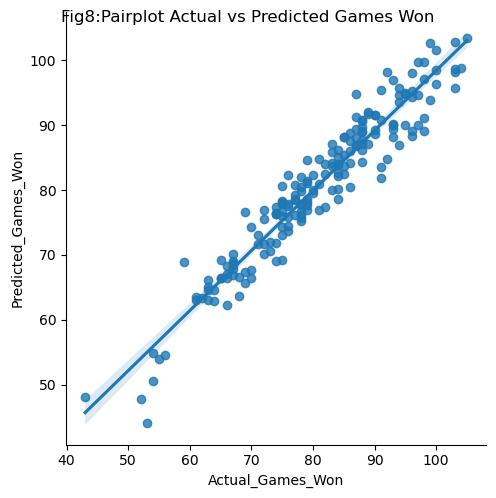

In [47]:
sns.pairplot(predict_values, x_vars='Actual_Games_Won', y_vars='Predicted_Games_Won', height=5, kind='reg')
plt.suptitle("Fig8:Pairplot Actual vs Predicted Games Won")

#### Calculate MAE, MSE, RMSE

In [35]:
mae=metrics.mean_absolute_error(predict_values['Actual_Games_Won'], predict_values['Predicted_Games_Won'])
mse=metrics.mean_squared_error(predict_values['Actual_Games_Won'], predict_values['Predicted_Games_Won'])
rmse=np.sqrt(metrics.mean_squared_error(predict_values['Actual_Games_Won'], predict_values['Predicted_Games_Won']))

In [36]:
print ('Mean Absolute Error',mae)
print ('Mean Squared Error',mse)
print ('Root Mean Square Error',rmse)

Mean Absolute Error 2.6562324826863297
Mean Squared Error 11.488829047220543
Root Mean Square Error 3.3895175242533475


#### This means that the expected accuracy of the prediction is +/- 3 as the predicted number of games won. This error is low considering the range of the predicted variable. 

### 6. Predictions

Using the regression model from period 4 to predict the number of games won by the New York Yankees and the Toronto Blue Jays using actual values for the independent variables from 2012 and 2015.

### Year 2012 

#### Create dataset df_2012 with independent variables from year 2012

In [48]:
df_2012 = df[(df['Year']==2012) & ((df['Team']=='NYA') | (df['Team']=='TOR'))]
df_2012_var = df_2012[['Year', 'Team', 'Games_Won', 'Runs_Scored', 'Earned_Run_Average', 'Saves']] 

#### Create new dataframe df_2012_games_won to keep track of actual and predicted games won to calculate the residuals  

In [38]:
df_2012_games_won = pd.DataFrame()
df_2012_games_won['Year']=df_2012_var['Year']
df_2012_games_won['Team']=df_2012_var['Team']
df_2012_games_won['Actual']=df_2012_var['Games_Won']
df_2012_games_won['Predicted']=lm2.predict(df_2012_var)
df_2012_games_won['residual']=df_2012_var['Games_Won']-lm2.predict(df_2012_var)
df_2012_games_won.set_index('Year')

,Team,Actual,Predicted,residual
Year,,,,
2012,NYA,95,95.331864,-0.331864
2012,TOR,73,68.277015,4.722985


#### Calculate model errors 

In [39]:
y_actual = df_2012_games_won['Actual']
y_predict = df_2012_games_won['Predicted']

mae=metrics.mean_absolute_error(y_actual, y_predict)
mse=metrics.mean_squared_error(y_actual, y_predict)
rmse=np.sqrt(metrics.mean_squared_error(y_actual, y_predict))

In [40]:
print ('Mean Absolute Error',mae)
print ('Mean Squared Error',mse)
print ('Root Mean Square Error',rmse)

Mean Absolute Error 2.5274242389861215
Mean Squared Error 11.208360021199955
Root Mean Square Error 3.347888890211256


#### Calculate expected accuracy of the prediction

In [53]:
expected_accuracy_2012 = (rmse/(y_actual.mean()))*100
print ("The expected accuracy of the prediction is", expected_accuracy_2012, "%")

The expected accuracy of the prediction is 3.0337090457523694 %


### Year 2015 

#### Create dataset df_2015 with independent variables from year 2015 

In [42]:
df_2015 = df[(df['Year']==2015) & ((df['Team']=='NYA') | (df['Team']=='TOR'))]
df_2015_var = df_2015[['Year', 'Team', 'Games_Won', 'Runs_Scored', 'Earned_Run_Average', 'Saves']] 
#df_2015_var.set_index('Year')

#### Create new dataframe df_2015_games_won to keep track of actual and predicted games won to calculate the residuals

In [43]:
df_2015_games_won = pd.DataFrame()
df_2015_games_won['Year']=df_2015_var['Year']
df_2015_games_won['Team']=df_2015_var['Team']
df_2015_games_won['Actual']=df_2015_var['Games_Won']
df_2015_games_won['Predicted']=lm2.predict(df_2015_var)
df_2015_games_won['residual']=df_2015_var['Games_Won']-lm2.predict(df_2015_var)
df_2015_games_won.set_index('Year')

,Team,Actual,Predicted,residual
Year,,,,
2015,TOR,93,96.416496,-3.416496
2015,NYA,87,88.146901,-1.146901


#### Calculate model errors 

In [44]:
x_actual = df_2015_games_won['Actual']
x_predict = df_2015_games_won['Predicted']

mae=metrics.mean_absolute_error(x_actual, x_predict)
mse=metrics.mean_squared_error(x_actual, x_predict)
rmse=np.sqrt(metrics.mean_squared_error(x_actual, x_predict))

In [45]:
print ('Mean Absolute Error',mae)
print ('Mean Squared Error',mse)
print ('Root Mean Square Error',rmse)

Mean Absolute Error 2.2816984206558644
Mean Squared Error 6.4939123892117925
Root Mean Square Error 2.5483155984319903


#### Calculate expected accuracy of the prediction 

In [46]:
expected_accuracy_2015 = (rmse/(x_actual.mean()))*100
print ("The expected accuracy of the prediction is", expected_accuracy_2015, "%")

The expected accuracy of the prediction is 2.8314617760355447 %


### 7. Conclusions 

This analysis generated multiple linear regression models to predict numbers of games won that included Runs Scored,Earned Run Average and Saves as predictors.  

From 2 separate models 'lm_offensive' and 'lm_defensive', it shows that there is a fair relationship between number of games won and
- dominantly offensive plays (adjusted R-squared=0.443) or 
- dominantly defensive plays (adjusted R-squared=0.558). 

<br>However, the final best fit model 'lm2' comprised of **combination of both types of plays shows an even stronger relationship to games won with adjusted R-squared of 0.919** 

Given the best fit model that was developed using best predictor features, we were able to **predict games won with expected accuracy of +/- 3 games.**

From the above analysis summary, we can conclude that a balanced type of play contributes to most games won. A winning team should have a repertoire of players with skillsets to accommodate a balanced type of play. 